<a href="https://colab.research.google.com/github/Shashank1202/Deep_Learning/blob/main/GANS/SimpleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMPLE GAN ARCHITECTURE**

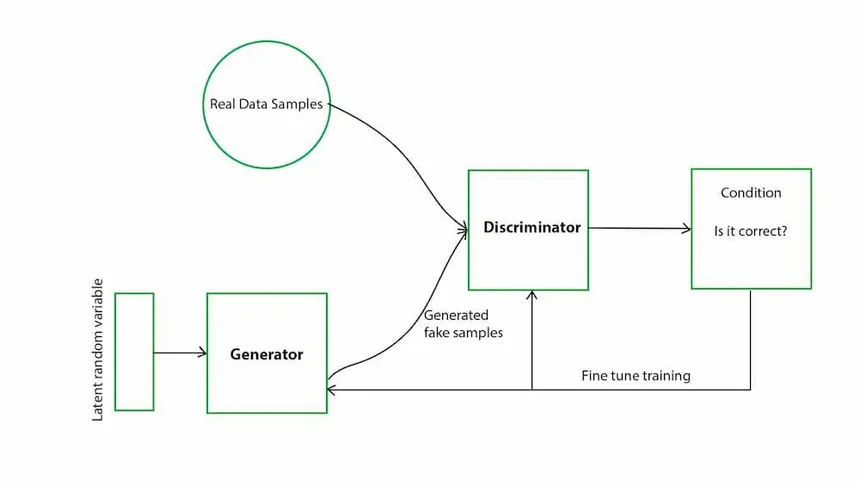

Importing the Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

Building Simple Discriminator Model

In [2]:
class Discriminator(nn.Module):
    def __init__(self, img_dim):
        super().__init__()
        self.disc= nn.Sequential(
            nn.Linear(img_dim, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.disc(x)

Building simple Generator Model

In [3]:
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen= nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, img_dim),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.gen(x)

Device settings

In [4]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'

Hyper Parameter

In [5]:
# Hyperparameter

lr= 3e-4
z_dim= 64
img_dim= 28*28*1
batch_size=32
num_epochs= 50

disc= Discriminator(img_dim).to(device)
gen= Generator(z_dim,img_dim).to(device)
fixed_noise= torch.randn((batch_size, z_dim)).to(device)
transform= transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
    )

Loading Datasets

In [6]:
dataset= datasets.MNIST(root= 'dataset/', transform=transform, download= True)
loader= DataLoader(dataset, batch_size=batch_size, shuffle= True)
opt_disc= optim.Adam(disc.parameters(), lr= lr)
opt_gen= optim.Adam(gen.parameters(), lr= lr)
criterion= nn.BCELoss()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5100635.22it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133945.43it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1243765.81it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11069453.09it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



Let's Train the Model

In [7]:
writer_fake= SummaryWriter(f"runs/GAN_MNIST/fake")
writer_real= SummaryWriter(f"runs/GANS_MNIST/real")
step= 0

for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real= real.view(-1, 784).to(device)
        batch_size= real.shape[0]

        #Train Discriminator: max log(D(real)) + log(1- D(g(z)))
        noise= torch.randn(batch_size, z_dim).to(device)
        fake= gen(noise)
        disc_real= disc(real).view(-1)
        lossD_real= criterion(disc_real, torch.ones_like(disc_real))
        disc_fake= disc(fake).view(-1)
        lossD_fake= criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD= (lossD_real + lossD_fake)/2
        disc.zero_grad()
        lossD.backward(retain_graph= True)
        opt_disc.step()

        #Train Generator: min log(1- D(G(z))) <--> max log(D(G(z)))
        output= disc(fake).view(-1)
        lossG= criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

        if batch_idx==0:
            print(
                f"Epoch [{epoch}/{num_epochs}]"
                f"Loss D: {lossD:.4f}, Loss G: {lossG:.4f}"
            )

            with torch.no_grad():
                fake= gen(fixed_noise).reshape(-1, 1, 28, 28)
                data= real.reshape(-1, 1, 28, 28)
                img_grid_fake= torchvision.utils.make_grid(fake, normalize= True)
                img_grid_real= torchvision.utils.make_grid(data, normalize= True)

                writer_fake.add_image(
                    "Mnist Fake Images", img_grid_fake, global_step= step
                )

                writer_real.add_image(
                    "Mnist Real Images", img_grid_real, global_step= step
                )
                step+=1

Epoch [0/50]Loss D: 0.7019, Loss G: 0.7288
Epoch [1/50]Loss D: 0.4445, Loss G: 1.0525
Epoch [2/50]Loss D: 0.7217, Loss G: 0.8980
Epoch [3/50]Loss D: 0.7577, Loss G: 0.7928
Epoch [4/50]Loss D: 0.5215, Loss G: 0.9308
Epoch [5/50]Loss D: 0.7112, Loss G: 0.8378
Epoch [6/50]Loss D: 0.4957, Loss G: 0.9949
Epoch [7/50]Loss D: 0.4488, Loss G: 1.0809
Epoch [8/50]Loss D: 0.7963, Loss G: 0.9367
Epoch [9/50]Loss D: 0.4734, Loss G: 1.3624
Epoch [10/50]Loss D: 0.4173, Loss G: 1.3552
Epoch [11/50]Loss D: 0.4856, Loss G: 1.2974
Epoch [12/50]Loss D: 0.4930, Loss G: 1.0677
Epoch [13/50]Loss D: 0.5117, Loss G: 1.1389
Epoch [14/50]Loss D: 0.6809, Loss G: 0.9810
Epoch [15/50]Loss D: 0.7527, Loss G: 0.9198
Epoch [16/50]Loss D: 0.6760, Loss G: 1.2028
Epoch [17/50]Loss D: 0.8863, Loss G: 0.7780
Epoch [18/50]Loss D: 0.8306, Loss G: 0.8340
Epoch [19/50]Loss D: 0.7301, Loss G: 0.9769
Epoch [20/50]Loss D: 0.3711, Loss G: 1.4144
Epoch [21/50]Loss D: 0.5437, Loss G: 1.1766
Epoch [22/50]Loss D: 0.5407, Loss G: 1.219

Visualization of Real and Fake Image

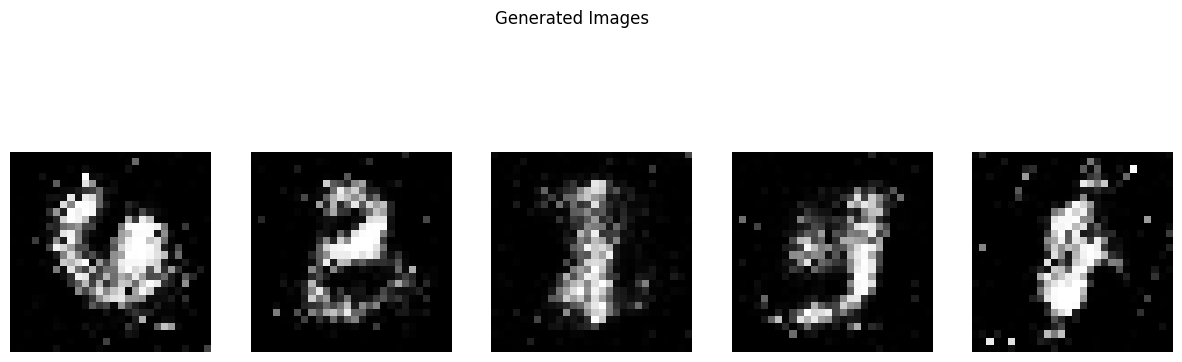

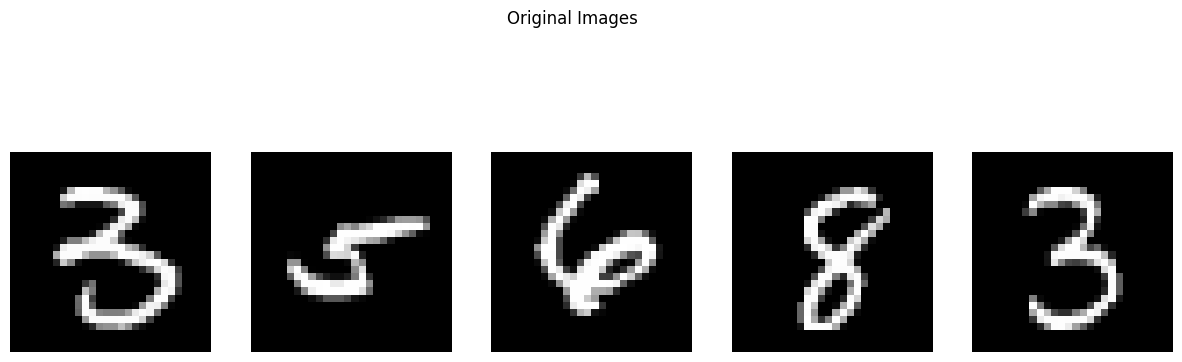

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to display images in a grid
def display_images(images, title, img_shape=(28, 28)):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    fig.suptitle(title)
    for i, img in enumerate(images):
        img = img.detach().cpu().numpy().reshape(img_shape)  # Move the tensor to CPU, convert to NumPy array, and reshape
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')

# Assume `fake` and `real` are the batches of generated and real images
batch_size = len(fake)
idx = np.random.choice(batch_size, size=5, replace=False)  # Select random indices to display

# Display the selected images
display_images(fake[idx], title='Generated Images')
display_images(real[idx], title='Original Images')
plt.show()

# Just played with 50 epochs try with more epochs for great accuracy!!!